Månedlig statistikk Oslo:
            mean     median       std
month                                
1      -2.361516  -2.394355  2.394507
2      -1.610323  -1.387500  2.361215
3       1.629860   2.087097  2.290695
4       6.579556   6.413333  1.282086
5      11.928075  11.969355  1.606796
6      15.996967  15.958333  1.387432
7      17.999602  17.769086  1.635348
8      16.789989  16.538172  1.055189
9      12.745033  12.687222  1.149982
10      7.045538   7.389785  1.597667
11      2.599764   2.816667  1.946680
12     -1.325366  -1.177151  2.936359

Månedlig statistikk Tromsø:
            mean     median       std
month                                
1      -3.177688  -3.279839  1.539403
2      -3.162434  -3.107471  1.833450
3      -1.915809  -1.730108  1.927991
4       1.508289   1.320000  1.268585
5       6.014301   5.939247  1.499837
6       9.664996   9.449167  1.432627
7      12.815766  12.648387  1.374749
8      11.869613  11.837634  1.288989
9       8.346867   8.086111  1.14

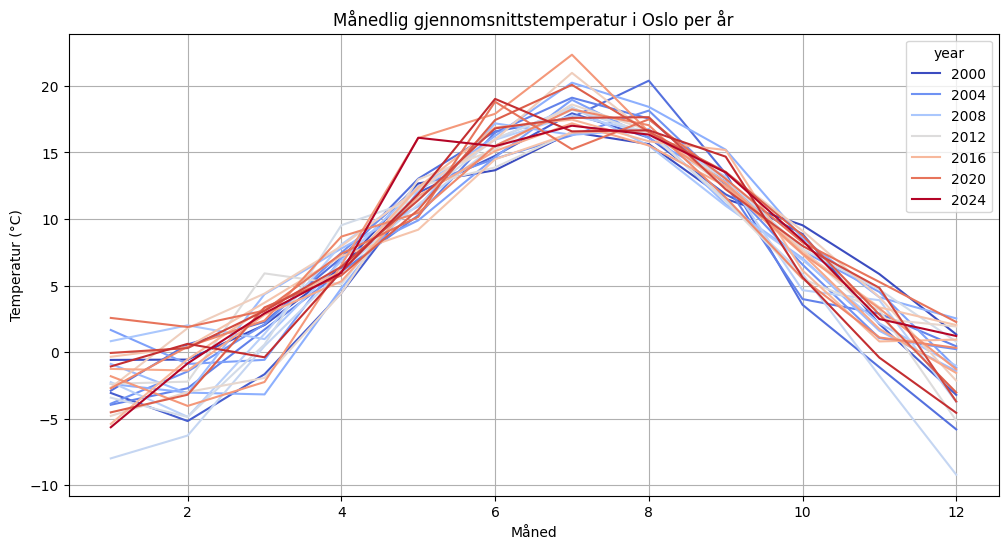

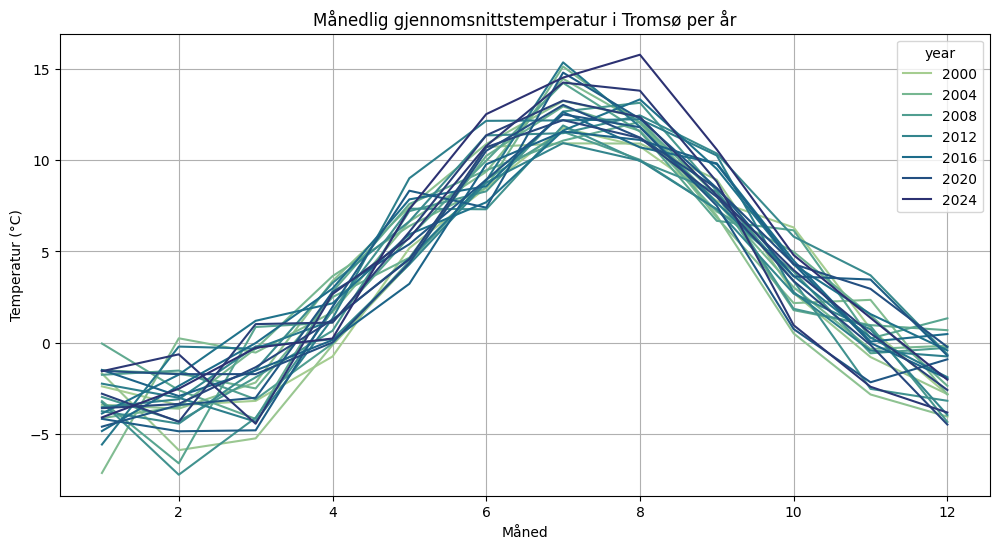

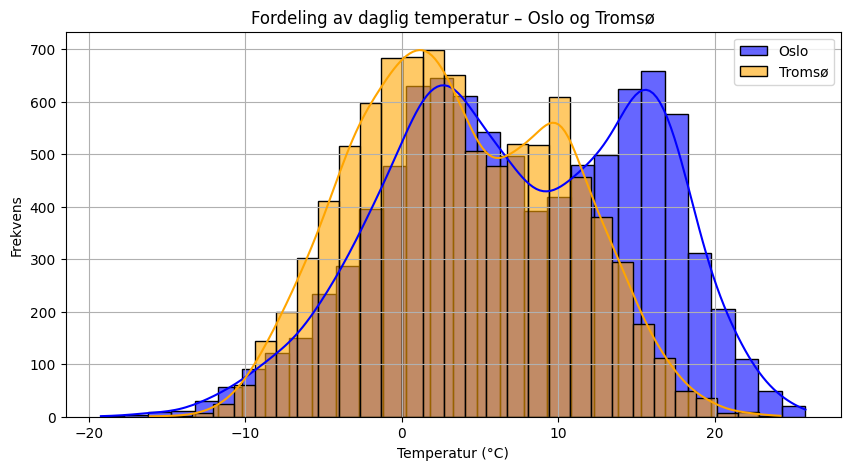

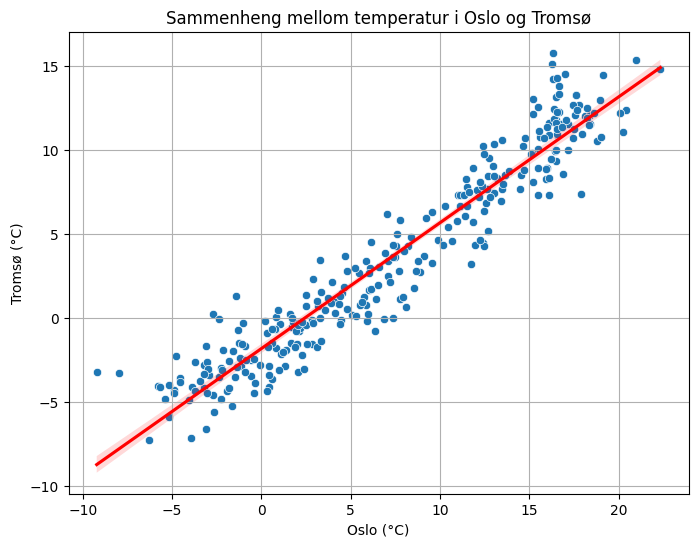

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Les inn data
df_oslo = pd.read_csv('../data/processed/vaerdata_oslo.csv')
df_tromso = pd.read_csv('../data/processed/vaerdata_tromso.csv')

# Rydding og parsing
for df in [df_oslo, df_tromso]:
    df['referenceTime'] = pd.to_datetime(df['referenceTime'])
    df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Filtrer temperaturdata
temp_oslo = df_oslo[df_oslo['elementId'].str.contains('air_temperature')].copy()
temp_tromso = df_tromso[df_tromso['elementId'].str.contains('air_temperature')].copy()

# Legg til dato, år, måned
for df in [temp_oslo, temp_tromso]:
    df['date'] = df['referenceTime'].dt.date
    df['year'] = df['referenceTime'].dt.year
    df['month'] = df['referenceTime'].dt.month

# Beregn daglig gjennomsnitt
daily_avg_oslo = temp_oslo.groupby('date')['value'].mean().reset_index()
daily_avg_tromso = temp_tromso.groupby('date')['value'].mean().reset_index()

# Legg til år og måned for gruppering
daily_avg_oslo['date'] = pd.to_datetime(daily_avg_oslo['date'])
daily_avg_tromso['date'] = pd.to_datetime(daily_avg_tromso['date'])

daily_avg_oslo['year'] = daily_avg_oslo['date'].dt.year
daily_avg_oslo['month'] = daily_avg_oslo['date'].dt.month

daily_avg_tromso['year'] = daily_avg_tromso['date'].dt.year
daily_avg_tromso['month'] = daily_avg_tromso['date'].dt.month

# Månedlige gjennomsnitt
monthly_avg_oslo = daily_avg_oslo.groupby(['year', 'month'])['value'].mean().reset_index()
monthly_avg_tromso = daily_avg_tromso.groupby(['year', 'month'])['value'].mean().reset_index()

# Statistiske mål aggregert over alle år
monthly_avg_oslo_stats = monthly_avg_oslo.groupby('month')['value'].agg(['mean', 'median', 'std'])
monthly_avg_tromso_stats = monthly_avg_tromso.groupby('month')['value'].agg(['mean', 'median', 'std'])

# Print statistikk
print("Månedlig statistikk Oslo:")
print(monthly_avg_oslo_stats)

print("\nMånedlig statistikk Tromsø:")
print(monthly_avg_tromso_stats)

# Enkel statistisk analyse: korrelasjon
merged = pd.merge(
    monthly_avg_oslo,
    monthly_avg_tromso,
    on=['year', 'month'],
    suffixes=('_oslo', '_tromso')
)

correlation = merged['value_oslo'].corr(merged['value_tromso'])
print(f"\nKorrelasjon mellom månedlig gjennomsnittstemperatur i Oslo og Tromsø: {correlation:.2f}")

# Visualiseringer
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_oslo, x='month', y='value', hue='year', palette='coolwarm')
plt.title('Månedlig gjennomsnittstemperatur i Oslo per år')
plt.ylabel('Temperatur (°C)')
plt.xlabel('Måned')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_tromso, x='month', y='value', hue='year', palette='crest')
plt.title('Månedlig gjennomsnittstemperatur i Tromsø per år')
plt.ylabel('Temperatur (°C)')
plt.xlabel('Måned')
plt.grid(True)
plt.show()

# Histogram for å vurdere skjevhet
plt.figure(figsize=(10, 5))
sns.histplot(daily_avg_oslo['value'].dropna(), bins=30, kde=True, color='blue', label='Oslo', alpha=0.6)
sns.histplot(daily_avg_tromso['value'].dropna(), bins=30, kde=True, color='orange', label='Tromsø', alpha=0.6)
plt.legend()
plt.title("Fordeling av daglig temperatur – Oslo og Tromsø")
plt.xlabel("Temperatur (°C)")
plt.ylabel("Frekvens")
plt.grid(True)
plt.show()

# Sammenheng mellom byene
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged, x='value_oslo', y='value_tromso')
sns.regplot(data=merged, x='value_oslo', y='value_tromso', scatter=False, color='red')
plt.title('Sammenheng mellom temperatur i Oslo og Tromsø')
plt.xlabel('Oslo (°C)')
plt.ylabel('Tromsø (°C)')
plt.grid(True)
plt.show()


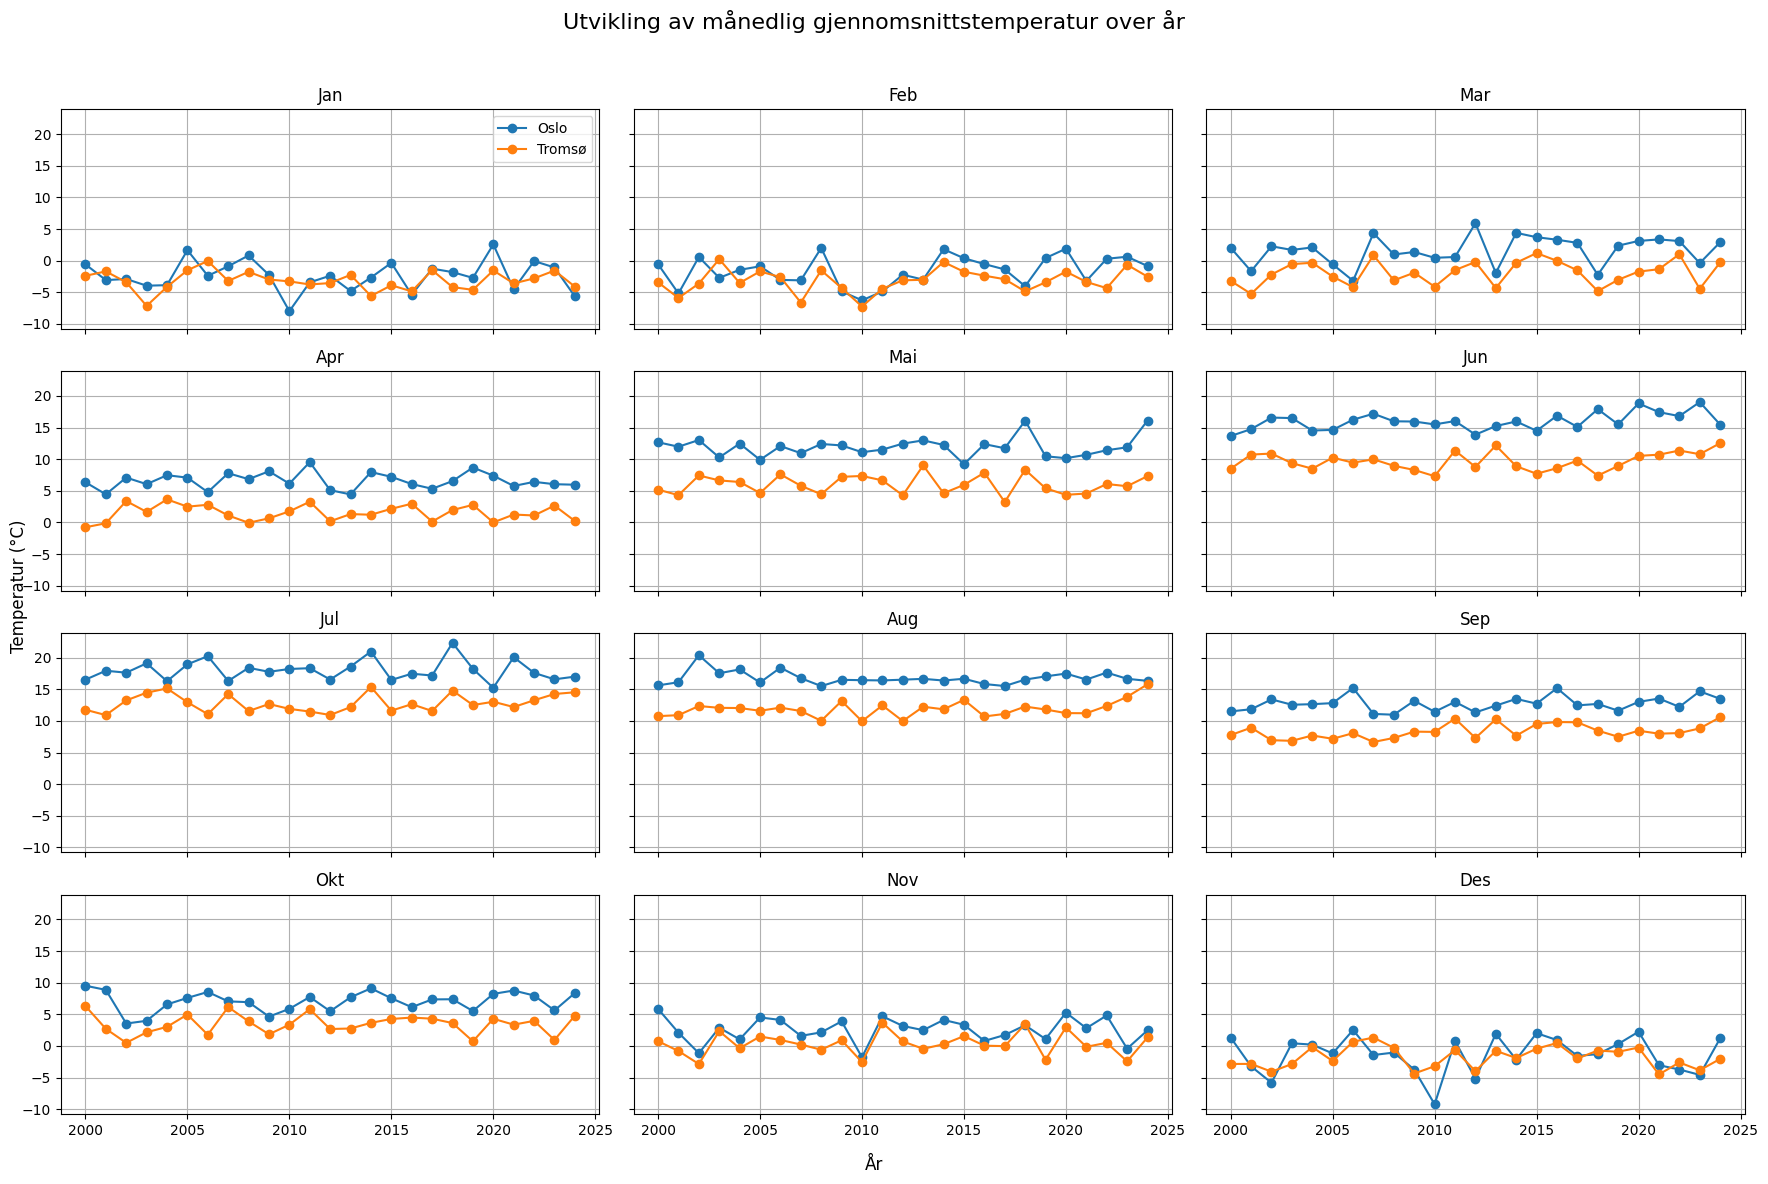

In [12]:
import matplotlib.pyplot as plt

months = range(1, 13)
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Des']

fig, axs = plt.subplots(4, 3, figsize=(18, 12), sharex=True, sharey=True)
axs = axs.flatten()

for i, month in enumerate(months):
    ax = axs[i]
    # Filtrer data for én måned
    oslo_month = monthly_avg_oslo[monthly_avg_oslo['month'] == month]
    tromso_month = monthly_avg_tromso[monthly_avg_tromso['month'] == month]

    ax.plot(oslo_month['year'], oslo_month['value'], label='Oslo', color='tab:blue', marker='o')
    ax.plot(tromso_month['year'], tromso_month['value'], label='Tromsø', color='tab:orange', marker='o')

    ax.set_title(month_labels[i])
    ax.grid(True)

# Felles etiketter
fig.suptitle('Utvikling av månedlig gjennomsnittstemperatur over år', fontsize=16)
fig.supxlabel('År')
fig.supylabel('Temperatur (°C)')
axs[0].legend()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
